## Model Training on SVC

In [49]:
import numpy as np
from sklearn import svm
import tensorflow as tf
from sklearn.metrics import accuracy_score
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Set the visible GPU device number


# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Train an SVM with RBF kernel on GPU and CPU
with tf.device('/device:GPU:0'):
    clf = svm.SVC(kernel='rbf',verbose=1)

with tf.device('/device:CPU:0'):
    clf.n_jobs = -1
    clf.fit(x_train, y_train.ravel())

# Evaluate the SVM on GPU and CPU
with tf.device('/device:GPU:0'):
    y_pred = clf.predict(x_test)

with tf.device('/device:CPU:0'):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)


[LibSVM]Accuracy: 0.5436


## Saving the Model

In [46]:
import pickle

# Save the SVM model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Load the Saved Model

In [4]:
# Load the SVM model from the file
import pickle
with open('svm_model.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

## Performing Evaluation Metrics

In [24]:
import pickle
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  ## Loading the dataset


x_test = x_test.astype('float32') / 255       ## Normalizing the pixel values within 0 and 1
x_test = x_test.reshape(x_test.shape[0], -1)  ## Reshaping the values to 1D array
    


# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)

Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.64      0.65      0.64      1000
           2       0.42      0.41      0.41      1000
           3       0.38      0.39      0.38      1000
           4       0.47      0.43      0.45      1000
           5       0.49      0.43      0.46      1000
           6       0.54      0.64      0.58      1000
           7       0.63      0.57      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



## Predicting with our own images

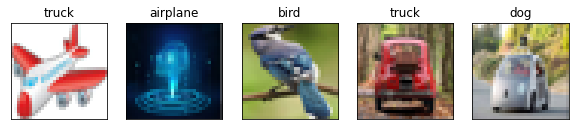

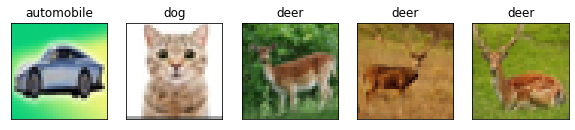

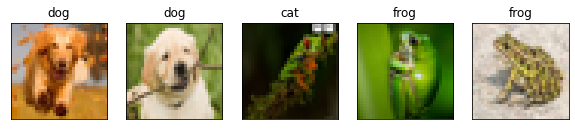

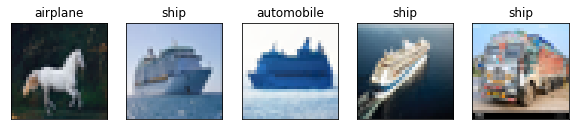

<Figure size 720x576 with 0 Axes>

In [35]:
import os
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


    
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Set the path to the directory containing the images
image_dir = 'Images/'

# Loop through all image files in the directory
fig = plt.figure(figsize=(10,8))
counter = 0
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png') or filename.endswith('.JPG'):
        
        # Print the filename for debugging purposes
        img_path = os.path.join(image_dir, filename)          
        img = image.load_img(img_path, target_size=(32, 32))  ## Loading image with size 32*32
        img_array = image.img_to_array(img)                   ## Converting image to array
        img_array = img_array.astype('float32') / 255         ## Normalizing the pixel values between 0 and 1
        img_array = img_array.reshape(1,-1)                   ## Reshaping to 1D array

        # Predict the class of the image
        result = clf_loaded.predict(img_array)
        class_index = result[0]
        predicted_class_name = class_names[class_index]

        # Plot the image and its predicted class
        plt.subplot(1, 5, counter%5+1)
        plt.imshow(img)
        plt.title(predicted_class_name)
        plt.xticks([])
        plt.yticks([])
        counter += 1
        
        # Create a new row of images after every 5 images
        if counter % 5 == 0:
            plt.show()
            plt.figure(figsize=(10, 8))
    
# Show any remaining images that haven't been displayed yet
if counter % 5 != 0:
    plt.show()


## Predicting on test set images

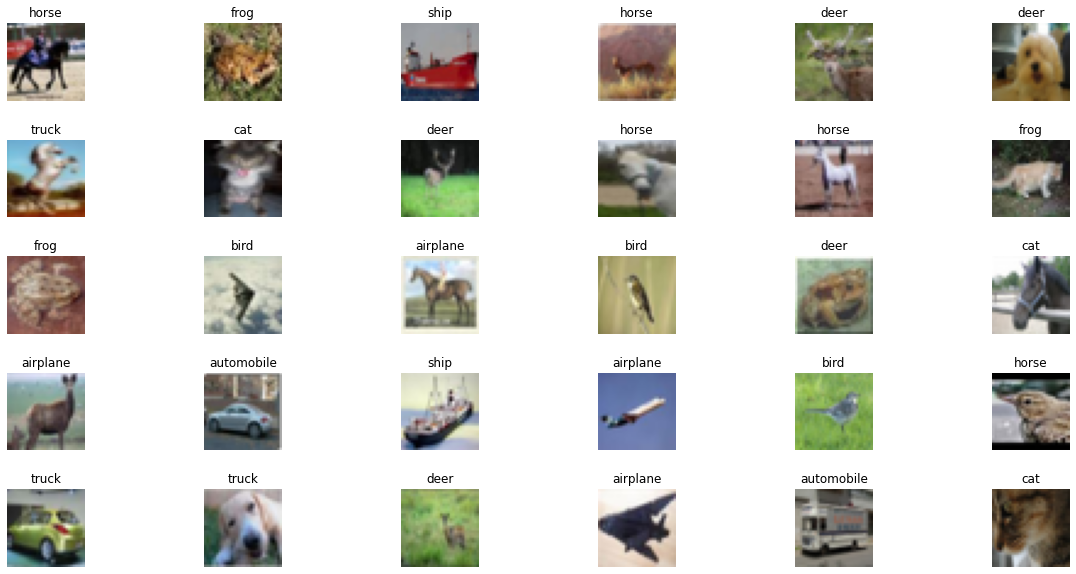

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the number of rows and columns in the grid
rows = 5
cols = 6

# Create a new figure for the grid
fig = plt.figure(figsize=(20,10))

# Loop through a subset of the images
for i in range(rows*cols):
    # Get the image and preprocess it
    img = x_test[i+5000]
    img_arr = img.reshape(1,-1)
    
    # Make a prediction with the SVM
    result = clf_loaded.predict(img_arr)
    
    # Get the predicted class name
    class_index = result[0]
    predicted_class_name = class_names[class_index]
    
    # Add the image and label to the grid
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img.reshape(32, 32, 3))
    ax.set_title(predicted_class_name)
    ax.axis('off')
    
# Show the grid of images
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
